#Prompt Caching

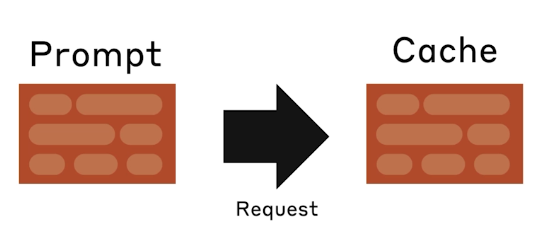

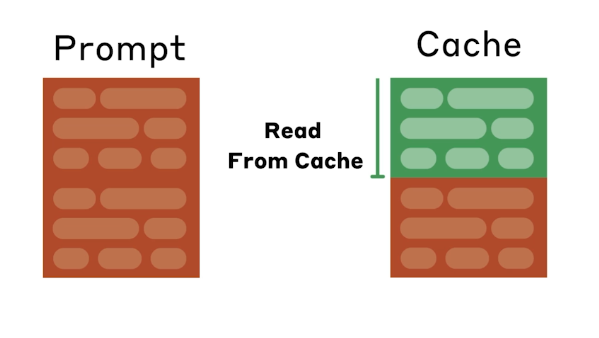

Source- https://learn.deeplearning.ai/courses/building-toward-computer-use-with-anthropic/lesson/6/prompt-caching


In [1]:
!pip install anthropic==0.42.0

In [2]:
from anthropic import Anthropic

In [3]:
from google.colab import userdata

anthropic_api_key = userdata.get('Anthropic_API')

In [4]:
client = Anthropic(api_key=anthropic_api_key)
MODEL_NAME="claude-3-5-sonnet-20241022"

### Loading The Book

In [5]:
with open('/content/frankenstein-mini.txt', 'r') as file:
    book_content = file.read()

In [6]:
len(book_content)

8225

In [7]:
book_content[1000:2000]

'by Mary Wollstonecraft (Godwin) Shelley\n\n\n CONTENTS\n\n Letter 1\n Letter 2\n Letter 3\n Letter 4\n Chapter 1\n Chapter 2\n Chapter 3\n Chapter 4\n Chapter 5\n Chapter 6\n Chapter 7\n Chapter 8\n Chapter 9\n Chapter 10\n Chapter 11\n Chapter 12\n Chapter 13\n Chapter 14\n Chapter 15\n Chapter 16\n Chapter 17\n Chapter 18\n Chapter 19\n Chapter 20\n Chapter 21\n Chapter 22\n Chapter 23\n Chapter 24\n\n\n\n\nLetter 1\n\n_To Mrs. Saville, England._\n\n\nSt. Petersburgh, Dec. 11th, 17—.\n\n\nYou will rejoice to hear that no disaster has accompanied the\ncommencement of an enterprise which you have regarded with such evil\nforebodings. I arrived here yesterday, and my first task is to assure\nmy dear sister of my welfare and increasing confidence in the success\nof my undertaking.\n\nI am already far north of London, and as I walk in the streets of\nPetersburgh, I feel a cold northern breeze play upon my cheeks, which\nbraces my nerves and fills me with delight. Do you understand this\n

## Uncached Request

In [8]:
import time
def make_non_cached_api_call():
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "<book>" + book_content + "</book>"
                },
                {
                    "type": "text",
                    "text": "What happens in Letter 1?"
                }
            ]
        }
    ]

    start_time = time.time()
    response = client.messages.create(
        model=MODEL_NAME,
        max_tokens=500,
        messages=messages,
    )
    end_time = time.time()

    return response, end_time - start_time

In [9]:
non_cached_response, non_cached_time = make_non_cached_api_call()
print(f"Non-cached time: {non_cached_time:.2f} seconds")

print("\nOutput (non-cached):")
print(non_cached_response.content)

Non-cached time: 6.42 seconds

Output (non-cached):
[TextBlock(text='In Letter 1, R. Walton writes to his sister Margaret Saville in England from St. Petersburg, Russia. Here are the key points from his letter:\n\n1. He assures her of his safety and well-being, knowing she has had concerns about his enterprise.\n\n2. He describes his excitement about his upcoming Arctic expedition, expressing romantic notions about the North Pole as a place of "beauty and delight" with perpetual sunlight.\n\n3. He explains his goals for the expedition:\n- To discover a northern passage to countries that currently take months to reach\n- To study the magnetic poles\n- To explore lands never before seen by humans\n\n4. He provides background about his journey to this point:\n- As a child, he was forbidden by his dying father to pursue a seafaring life\n- He briefly pursued poetry but failed\n- After inheriting money from his cousin, he returned to his maritime interests\n- He spent six years preparing, i

In [10]:
non_cached_response.usage

Usage(cache_creation_input_tokens=0, cache_read_input_tokens=0, input_tokens=2110, output_tokens=299)

## Cached Version

In [11]:
def make_cached_api_call():
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "<book>" + book_content + "</book>",
                    "cache_control": {"type": "ephemeral"}
                },
                {
                    "type": "text",
                    "text": "What happens in Letter 1?"
                }
            ]
        }
    ]

    start_time = time.time()
    response = client.messages.create(
        model=MODEL_NAME,
        max_tokens=500,
        messages=messages,
    )
    end_time = time.time()

    return response, end_time - start_time

In [12]:
response1, duration1 = make_cached_api_call()

In [13]:
response1.usage

Usage(cache_creation_input_tokens=2099, cache_read_input_tokens=0, input_tokens=11, output_tokens=326)

In [14]:
response2, duration2 = make_cached_api_call()

In [15]:
response2.usage

Usage(cache_creation_input_tokens=0, cache_read_input_tokens=2099, input_tokens=11, output_tokens=348)

In [16]:
duration2

7.38532018661499

## Prompt Caching Pricing

* Cache write tokens are 25% more expensive than base input tokens
* Cache read tokens are 90% cheaper than base input tokens
* Regular input and output tokens are priced at standard rates